# README Examples

In [1]:
%load_ext autoreload
%autoreload 2

# import datetime
# import math

# import numpy as np
# import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

from src.data.gym import start_gym_session, get_gym_ids, get_gym_data, save_gym_data
from src.features.processing import load_gym_data
from src.utils import get_project_root
from src.visualisation.plotting import plot_24h

In [2]:
ROOT_DIR = get_project_root()
plt.style.use(ROOT_DIR / "style.mplstyle")

## Fetching data

In [3]:
# from src.data.gym import start_gym_session, get_gym_ids, get_gym_data, save_gym_data

# # username should be your TheGym membership email
# # password should be your TheGym membership PIN (8-digits as a string, e.g.: "12345678")
# sess = start_gym_session(username="your_email@provider.com", password="your_PIN")

In [4]:
gyms = get_gym_ids()
for branch, identifier in gyms.items():
    print(branch, identifier)

Altrincham 057d7a7c-a61a-423f-b21f-54adedc1cd0d
Ashford 5cc9b50b-c049-49d2-a929-b9e9ec34f9ba
Aylesbury e78d673c-e92e-49e6-b8c2-5757aa73d2fc
Ayr 1da982fc-d7d7-4067-b6c2-d4bafc6527c3
Barnsley ded7f226-41d2-47c2-8a50-63683e7cfa59
Barrow-in-Furness db2b6344-7482-49c8-a7a1-b712e8c9c66f
Basingstoke d8a9135d-fa45-4ab9-b7f6-aaaa7cab5450
Bedford c819380d-97a6-413d-8ab5-808fd76ef485
Beverley 6938011a-fb34-4661-aa2c-da524f932ed6
Bexleyheath 5325c802-8951-4743-8d61-e4339076b142
Birmingham Broad Street df354800-5fd0-4510-b9b8-3d4a39c61146
Birmingham City Centre 314ca93f-86d2-4c94-9e58-76dac78675eb
Birmingham Digbeth 4936eab8-d5c5-4924-bfb4-18b86f0a3cbe
Birmingham Hagley Road f795f104-5597-462a-9bdd-f766cb5594ed
Birmingham Kings Heath a5f0bbe2-cda9-45ad-89ba-365d7c0709a8
Birmingham Kingsbury Road 5308d452-f8b2-405b-85df-5c9118cc8933
Birmingham Perry Barr bef686ad-9705-4e39-ad03-9907c9a2dfd3
Birmingham Sheldon abc70abc-1953-4bc5-a2d2-e0bd94075f56
Birmingham Stechford cb7d1d3e-1e99-48a0-9bb2-a26de2de5

In [5]:
# data = get_gym_data(sess, gyms["London Angel"])  # returns data as JSON
# save_gym_data(data)  # appends data to `./data/interim/gym.csv`

## 1.2 Plotting data

In [6]:
df = load_gym_data()  # loads pre-collected data since 2021-04-25 for London Angel, on 15-minute time interval
df.sample(10)

,time,name,capacity
7094,2021-07-10 05:45:00,London Angel,5.0
14262,2021-09-23 16:45:00,London Angel,36.0
14331,2021-09-24 10:00:00,London Angel,20.0
12195,2021-09-02 01:15:00,London Angel,5.0
14982,2021-10-01 17:15:00,London Angel,27.0
7908,2021-07-18 21:30:00,London Angel,25.0
24971,2022-01-17 10:45:00,London Angel,27.0
1681,2021-05-13 13:15:00,London Angel,34.0
7198,2021-07-11 07:45:00,London Angel,10.0
9965,2021-08-09 13:15:00,London Angel,35.0


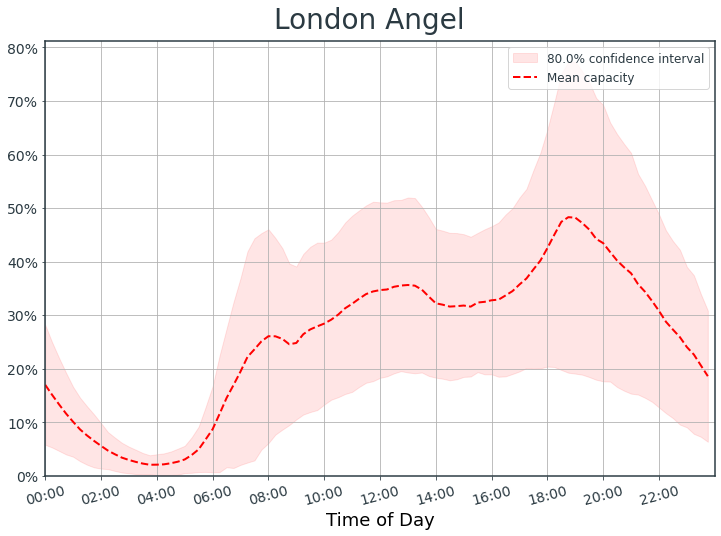

In [7]:
# for all data
fig, ax = plt.subplots()
ax = plot_24h(df, conf_interval=0.8, ax=ax)
fig.suptitle(f"London Angel", fontsize=28, y=0.94)
fig.savefig(ROOT_DIR / "figures" / f"London_Angel.png")
fig

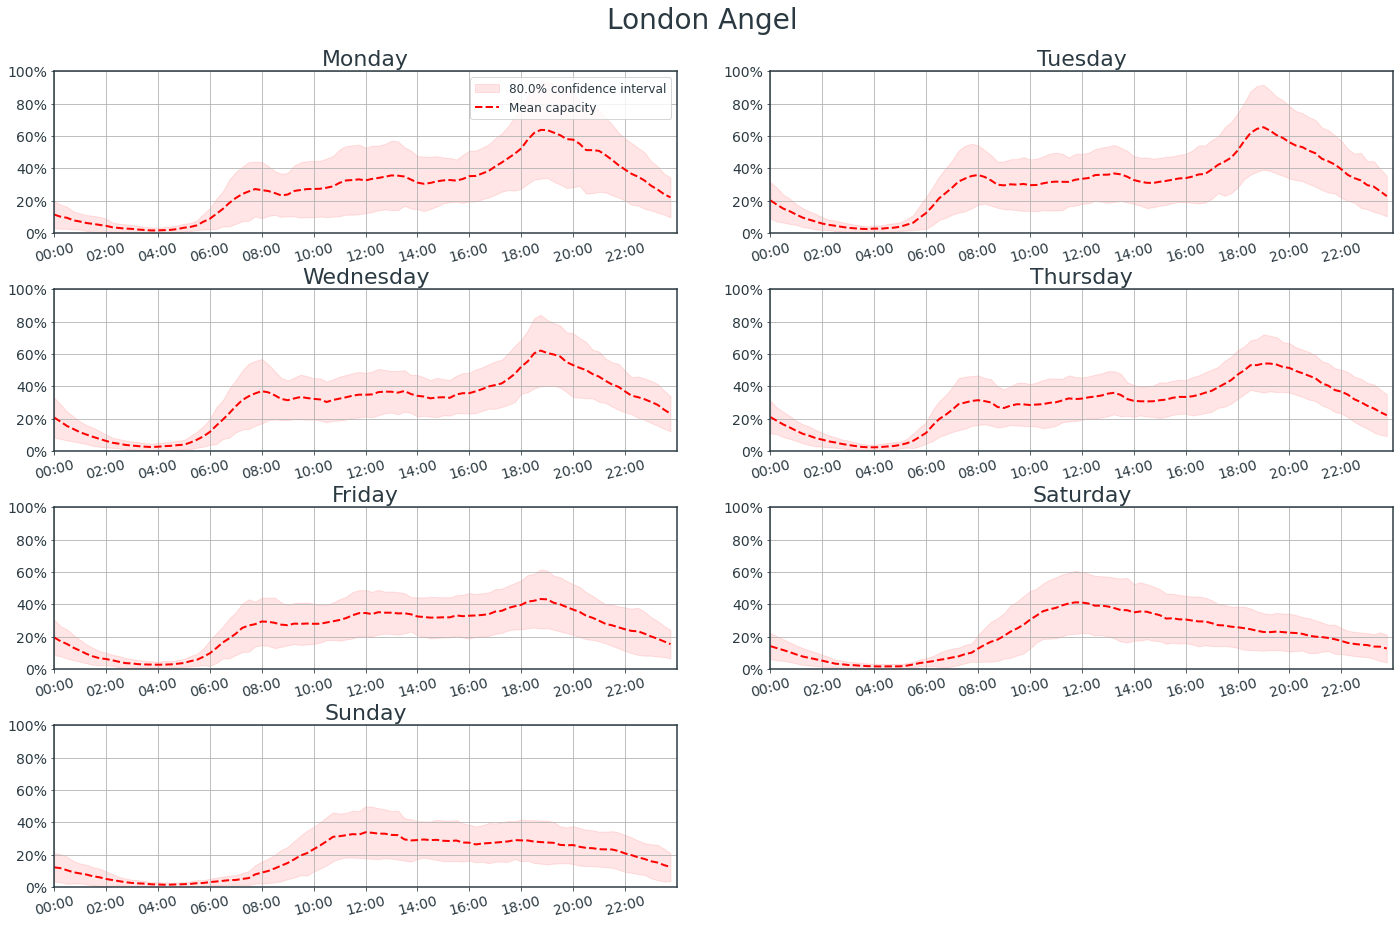

In [8]:
# for each day of the week
fig = plt.figure(figsize=(24, 15))
spec = gridspec.GridSpec(4, 2, wspace=0.15, hspace=0.35)

dft = df.copy()
dft["dow"] = dft["time"].dt.dayofweek

for i, day in enumerate(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
):
    ax = fig.add_subplot(spec[i])
    dfd = dft.query(f"dow == {i}").drop("dow", axis=1)
    plot_24h(dfd, ax=ax, ylim=100, conf_interval=0.8)
    ax.set_xlabel("")
    ax.set_title(f"{day}", y=1)
    if i != 0:
        ax.legend().remove()
    fig.add_subplot(ax)

fig.suptitle(f"London Angel", fontsize=28, y=0.94)
fig.savefig(ROOT_DIR / "figures" / f"London_Angel-days_of_week.png")
fig